## 0. LIBRARIES USED

In [29]:
import keras
import numpy as np
import pandas as pd
import os
from keras.preprocessing import image
import tensorflow as tf
from PIL import Image
from sklearn.metrics import accuracy_score
import re
import src.models as md
import src.downloading as dl

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input, EfficientNetB0

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
from tensorflow.keras.preprocessing import image

## 1. MODEL CREATION

Let's upload the dataset in order to create our model:

In [33]:
df=pd.read_csv('datasets/df_f_new.csv')
df

,Image,Category
0,battery/battery1.jpg,0
1,battery/battery10.jpg,0
2,battery/battery100.jpg,0
3,battery/battery101.jpg,0
4,battery/battery102.jpg,0
...,...,...
8208,white-glass/white-glass95.jpg,9
8209,white-glass/white-glass96.jpg,9
8210,white-glass/white-glass97.jpg,9
8211,white-glass/white-glass98.jpg,9


Hereby we are going to assing the labels to our categories

In [34]:
garbage_types_labels = {
    0: 'battery',
    1: 'biological',
    2: 'brown-glass',
    3: 'cardboard',
    4: 'green-glass',
    5: 'metal',
    6: 'paper',
    7: 'plastic',
    8: 'trash',
    9: 'white-glass'
}

In [35]:
df

,Image,Category
0,battery/battery1.jpg,0
1,battery/battery10.jpg,0
2,battery/battery100.jpg,0
3,battery/battery101.jpg,0
4,battery/battery102.jpg,0
...,...,...
8208,white-glass/white-glass95.jpg,9
8209,white-glass/white-glass96.jpg,9
8210,white-glass/white-glass97.jpg,9
8211,white-glass/white-glass98.jpg,9


In [36]:
unique_values = df['Category'].unique()
print(unique_values)

[0 1 2 3 4 5 6 7 8 9]


Let's replaced the numerical vattegories into categorical in order to make our model

In [37]:
df["Category"] = df["Category"].replace(garbage_types_labels) 

In [38]:
df

,Image,Category
0,battery/battery1.jpg,battery
1,battery/battery10.jpg,battery
2,battery/battery100.jpg,battery
3,battery/battery101.jpg,battery
4,battery/battery102.jpg,battery
...,...,...
8208,white-glass/white-glass95.jpg,white-glass
8209,white-glass/white-glass96.jpg,white-glass
8210,white-glass/white-glass97.jpg,white-glass
8211,white-glass/white-glass98.jpg,white-glass


And we download the dataset:

In [39]:
df_classified=dl.to_csv(df,'datasets/df_classified.csv')

- Splitting the dataframe into training and validation sets:
```train_df, validate_df = train_test_split(df, test_size=0.2, random_state=42)```

- Further splitting the validation set into validation and test sets:
```validate_df, test_df = train_test_split(validate_df, test_size=0.5, random_state=42)```

- Resetting the index of the training, validation, and test dataframes:
```train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)```

- Obtaining the number of samples in each set:

```train = train_df.shape[0] (number of samples in the training set)```

```validate = validate_df.shape[0] (number of samples in the validation set)```

```test = test_df.shape[0] (number of samples in the test set)```
    
- This code segment performs the data splitting process and calculates the number of samples in each set: training, validation, and test.

In [40]:
train_df, validate_df = train_test_split(df, test_size=0.2, random_state=42)
validate_df, test_df = train_test_split(validate_df, test_size=0.5, random_state=42)

train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

train = train_df.shape[0]
validate = validate_df.shape[0]
test=test_df.shape[0]

In [41]:
test

822

In [42]:
validate

821

In [43]:
train_df = train_df.reset_index(drop=True)
train_df

,Image,Category
0,green-glass/green-glass209.jpg,green-glass
1,paper/paper880.jpg,paper
2,green-glass/green-glass544.jpg,green-glass
3,biological/biological59.jpg,biological
4,cardboard/cardboard58.jpg,cardboard
...,...,...
6565,paper/paper871.jpg,paper
6566,paper/paper382.jpg,paper
6567,paper/paper561.jpg,paper
6568,battery/battery874.jpg,battery


In [44]:
df['Category'].value_counts()

Category
paper          1050
biological      985
battery         945
cardboard       891
plastic         865
white-glass     775
metal           769
trash           697
green-glass     629
brown-glass     607
Name: count, dtype: int64

In [45]:
train_df['Category'].value_counts()

Category
paper          833
biological     769
battery        750
cardboard      725
plastic        702
white-glass    621
metal          604
trash          560
green-glass    505
brown-glass    501
Name: count, dtype: int64

In [46]:
validate_df['Category'].value_counts()

Category
paper          113
battery         95
biological      93
metal           88
plastic         86
cardboard       83
white-glass     72
trash           67
green-glass     64
brown-glass     60
Name: count, dtype: int64

In [47]:
test_df['Category'].value_counts()

Category
biological     123
paper          104
battery        100
cardboard       83
white-glass     82
metal           77
plastic         77
trash           70
green-glass     60
brown-glass     46
Name: count, dtype: int64

### TO CSV

These lines of code perform the task of saving the modified dataframes into separate CSV files. The files are saved in the specified directory with the given names, and the index column is not included in the saved files.

In [48]:
train_df.to_csv('model_data_train_test_val/train_new.csv', index=False)
test_df.to_csv('model_data_train_test_val/test_new.csv',index=False)
validate_df.to_csv('model_data_train_test_val/validation_new.csv',index=False)

- Setting the height and width of the images to be resized during preprocessing:

img_height = 224
img_width = 224
img_size = (img_width, img_height)
- Creating an instance of the ImageDataGenerator class for training data, which applies preprocessing function and splits the data for validation:

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)
Creating an instance of the ImageDataGenerator class for testing data, which rescales the pixel values:

test_datagen = ImageDataGenerator(rescale=1.0/255.0)
- Creating an instance of the ImageDataGenerator class for validation data, which rescales the pixel values:

valid_datagen = ImageDataGenerator(rescale=1./255)
- These lines of code define the parameters and configurations for the image data generators used for training, testing, and validation. The generators handle data preprocessing and augmentation tasks, such as resizing images and rescaling pixel values, which are essential for training machine learning models on image data.

In [49]:
num_classes=10

In [50]:
img_height = 224
img_width = 224
img_size=(img_width,img_height)

In [51]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [52]:
print(train_df['Category'].dtype)

object


In [53]:
unique_values = train_df['Category'].unique()
print(unique_values)

['green-glass' 'paper' 'biological' 'cardboard' 'white-glass'
 'brown-glass' 'trash' 'plastic' 'metal' 'battery']


In [54]:
data_directory = "new_garbage_classification/"

- Creating a generator for training data using the flow_from_dataframe method of the train_datagen object:
train_generator: It is created using the flow_from_dataframe method and takes the train_df dataframe as input. It specifies the directory where the images are located (data_directory), the column name for the image filenames (x_col), the column name for the image labels (y_col), the target size of the images (img_size), the class mode set to 'categorical' since it's a multi-class classification task, and the batch size of 64.

- Creating a generator for validation data using the flow_from_dataframe method of the train_datagen object:
validation_generator: It is created using the flow_from_dataframe method and takes the validate_df dataframe as input. It has similar parameters as the train_generator, except for the batch size, which is set to 32.

- Creating a generator for testing data using the flow_from_dataframe method of the test_datagen object:
test_generator: It is created using the flow_from_dataframe method and takes the test_df dataframe as input. It has similar parameters as the train_generator, except for the batch size, which is set to 32.

- These generators are used to feed the image data in batches to the model during training, validation, and testing. They automatically load and preprocess the images from the specified directories and provide the corresponding labels for each image.

In [55]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df, 
    directory=data_directory, 
    x_col='Image',
    y_col='Category',
    target_size=img_size,
    class_mode='categorical',
    batch_size=64
)

Found 6570 validated image filenames belonging to 10 classes.


In [56]:
validation_generator = train_datagen.flow_from_dataframe(
    dataframe=validate_df,
    directory=data_directory,
    x_col='Image',
    y_col='Category',
    target_size=img_size,
    class_mode='categorical',
    batch_size=32)

Found 821 validated image filenames belonging to 10 classes.


In [57]:
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=data_directory,
    x_col='Image',
    y_col='Category',
    target_size=img_size,
    class_mode='categorical',
    batch_size=32
)

Found 822 validated image filenames belonging to 10 classes.


# 1. MODEL CREATION

This function takes inputs such as the path to save the model, the model name, image height and width, training and validation generators, and the number of epochs.
Setting the number of classes:

num_classes is set to 10. Modify this value according to the number of waste categories in your dataset.
Creating the base model:

The pre-trained EfficientNetB0 model is loaded from the imagenet weights, excluding the top layer.
The output of the base model is passed through a global average pooling layer and a dense layer with 512 units and ReLU activation.
The final predictions layer is added with the number of units equal to num_classes and softmax activation.
Defining the final model:

The model is defined using the input and output layers.
The layers of the base model are set to non-trainable.
Compiling the model:

The model is compiled with the Adam optimizer, categorical cross-entropy loss function, and accuracy metric.
Training the model:

The model is trained using the fit method, with the training and validation generators as input.
The number of epochs specified is used for training.
Saving the model:

The trained model is saved in the specified path with the given name.
Measuring the training time:

The start and end times are recorded using the datetime.now() function, and the duration is printed.
Returning the training history:

The training history object is returned.
You can call this create_model function by providing the necessary inputs to train and save the model.

In [21]:
from datetime import datetime
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

#model_0306_efficientnetB0

def create_model(path, name, img_height, img_width, train_generator, validation_generator, epochs):
    num_classes = 10

    start = datetime.now()

    # Crear el modelo base
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    # Definir el modelo final
    model = Model(inputs=base_model.input, outputs=predictions)

    # Congelar las capas del modelo base
    for layer in base_model.layers:
        layer.trainable = False

    # Compilar el modelo
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Entrenar el modelo
    history=model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

    try:
        model.save(f"{path}/{name}.h5")
    except:
        print("Modelo no guardado")

    end = datetime.now()

    print(f"It took {end-start} time")
    
    return history


In [34]:
history=create_model(".", "new2_model_0306_efficientnetB0", 224, 224, train_generator, validation_generator, epochs=10)

Epoch 1/10
206/206 [==============================] - 479s 2s/step - loss: 0.3531 - accuracy: 0.8869 - val_loss: 0.2223 - val_accuracy: 0.9342
Epoch 2/10
206/206 [==============================] - 477s 2s/step - loss: 0.0995 - accuracy: 0.9691 - val_loss: 0.2129 - val_accuracy: 0.9428
Epoch 3/10
206/206 [==============================] - 495s 2s/step - loss: 0.0547 - accuracy: 0.9814 - val_loss: 0.2030 - val_accuracy: 0.9428
Epoch 4/10
206/206 [==============================] - 491s 2s/step - loss: 0.0298 - accuracy: 0.9927 - val_loss: 0.2256 - val_accuracy: 0.9440
Epoch 5/10
206/206 [==============================] - 500s 2s/step - loss: 0.0244 - accuracy: 0.9938 - val_loss: 0.2230 - val_accuracy: 0.9379
Epoch 6/10
206/206 [==============================] - 417s 2s/step - loss: 0.0201 - accuracy: 0.9939 - val_loss: 0.2627 - val_accuracy: 0.9403
Epoch 7/10
206/206 [==============================] - 341s 2s/step - loss: 0.0251 - accuracy: 0.9916 - val_loss: 0.2683 - val_accuracy: 0.9379

In [22]:
from datetime import datetime
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

#model_0306_efficientnetB0

def create_model1(path, name, img_height, img_width, train_generator, validation_generator, epochs):
    num_classes = 10

    start = datetime.now()

    # Crear el modelo base
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    # Definir el modelo final
    model = Model(inputs=base_model.input, outputs=predictions)

    # Congelar las capas del modelo base
    for layer in base_model.layers:
        layer.trainable = False

    # Compilar el modelo
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Entrenar el modelo
    history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

    try:
        model.save(f"{path}/{name}.h5")
    except:
        print("Modelo no guardado")

    end = datetime.now()

    print(f"It took {end-start} time")
    
    return model, history

In [41]:
# Crear y guardar el modelo
model, history = create_model1(".", "new2_model_0806_efficientnetB0", 224, 224, train_generator, validation_generator, epochs=50)

Epoch 1/50
103/103 [==============================] - 341s 3s/step - loss: 0.3834 - accuracy: 0.8814 - val_loss: 0.2407 - val_accuracy: 0.9245
Epoch 2/50
103/103 [==============================] - 321s 3s/step - loss: 0.1125 - accuracy: 0.9654 - val_loss: 0.2150 - val_accuracy: 0.9391
Epoch 3/50
103/103 [==============================] - 317s 3s/step - loss: 0.0612 - accuracy: 0.9825 - val_loss: 0.2091 - val_accuracy: 0.9464
Epoch 4/50
103/103 [==============================] - 318s 3s/step - loss: 0.0362 - accuracy: 0.9907 - val_loss: 0.2171 - val_accuracy: 0.9403
Epoch 5/50
103/103 [==============================] - 315s 3s/step - loss: 0.0304 - accuracy: 0.9921 - val_loss: 0.1894 - val_accuracy: 0.9562
Epoch 6/50
103/103 [==============================] - 314s 3s/step - loss: 0.0209 - accuracy: 0.9953 - val_loss: 0.2275 - val_accuracy: 0.9464
Epoch 7/50
103/103 [==============================] - 316s 3s/step - loss: 0.0156 - accuracy: 0.9965 - val_loss: 0.2202 - val_accuracy: 0.9440

In [81]:
history

In [ ]:
import matplotlib.pyplot as plt

# Obtener historial de entrenamiento
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Crear gráfico de pérdida
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('fig/training_validation_loss2.png')  # Guardar el gráfico en la carpeta "fig"
plt.show()

# Crear gráfico de precisión
plt.figure(figsize=(10, 5))
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('new2_model_0306_efficientnetB0')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('fig/training_validation_loss3.png')  # Guardar el gráfico en la carpeta "fig"
plt.show()

Data aumentation

In [58]:
from datetime import datetime
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def create_model_aumentation(path, name, img_height, img_width, train_generator, validation_generator, epochs):
    num_classes = 10

    start = datetime.now()

    # Crear el modelo base
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    # Definir el modelo final
    model = Model(inputs=base_model.input, outputs=predictions)

    # Congelar las capas del modelo base
    for layer in base_model.layers:
        layer.trainable = False

    # Compilar el modelo
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Data augmentation para el generador de datos de entrenamiento
    datagen_train = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        preprocessing_function=preprocess_input
    )

    # Data augmentation para el generador de datos de validación
    datagen_val = ImageDataGenerator(preprocessing_function=preprocess_input)

    # Entrenar el modelo con data augmentation
    history=model.fit(train_generator, epochs=epochs, validation_data=validation_generator)


    try:
        model.save(f"{path}/{name}.h5")
    except:
        print("Modelo no guardado")

    end = datetime.now()

    print(f"It took {end-start} time")

    return model



In [ ]:
img_height = 224  # Altura de las imágenes de entrada
img_width = 224  # Anchura de las imágenes de entrada
epochs = 10  # Número de épocas de entrenamiento

history5 = create_model_aumentation(".", "data_aumentation_model_0306_efficientnetB0", img_height, img_width, train_generator, validation_generator, epochs)

Data aumentation y oversamplig

In [104]:
def calculate_class_weights(train_labels):
    unique_labels = np.unique(train_labels)
    class_counts = np.bincount(train_labels)
    total_samples = np.sum(class_counts)
    class_weights = total_samples / (len(unique_labels) * class_counts)
    class_weights_dict = dict(enumerate(class_weights))
    return class_weights_dict

In [102]:
from datetime import datetime
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import class_weight

def create_model_oversampling(path, name, img_height, img_width, train_generator, validation_generator, epochs):
    num_classes = 10

    start = datetime.now()

    # Crear el modelo base
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    # Definir el modelo final
    model = Model(inputs=base_model.input, outputs=predictions)

    # Congelar las capas del modelo base
    for layer in base_model.layers:
        layer.trainable = False

    # Compilar el modelo
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Calcular los pesos de clase para el oversampling
    class_weights = class_weight.compute_sample_weight('balanced', train_generator.labels)
    class_weights_dict = dict(enumerate(class_weights))

    # Data augmentation para el generador de datos de entrenamiento con oversampling
    datagen_train = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        preprocessing_function=preprocess_input
    )

    # Data augmentation para el generador de datos de validación
    datagen_val = ImageDataGenerator(preprocessing_function=preprocess_input)

    # Entrenar el modelo con data augmentation y oversampling
    history = model.fit_generator(
        datagen_train.flow(train_generator[0], train_generator[1], batch_size=64, sample_weight=class_weights),
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator)
    )

    try:
        model.save(f"{path}/{name}.h5")
    except:
        print("Modelo no guardado")

    end = datetime.now()

    print(f"It took {end-start} time")

    return model


In [ ]:
def create_model_oversampling(path, name, img_height, img_width, train_generator, validation_generator, epochs, class_weights):
    num_classes = 10

    start = datetime.now()

    # Crear el modelo base
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    # Definir el modelo final
    model = Model(inputs=base_model.input, outputs=predictions)

    # Congelar las capas del modelo base
    for layer in base_model.layers:
        layer.trainable = False

    # Compilar el modelo
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Data augmentation para el generador de datos de entrenamiento con oversampling
    datagen_train = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        preprocessing_function=preprocess_input
    )

    # Data augmentation para el generador de datos de validación
    datagen_val = ImageDataGenerator(preprocessing_function=preprocess_input)

    # Entrenar el modelo con data augmentation y oversampling
    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator,
        class_weight=class_weights
    )

    try:
        model.save(f"{path}/{name}.h5")
    except:
        print("Modelo no guardado")

    end = datetime.now()

    print(f"It took {end-start} time")

    return history


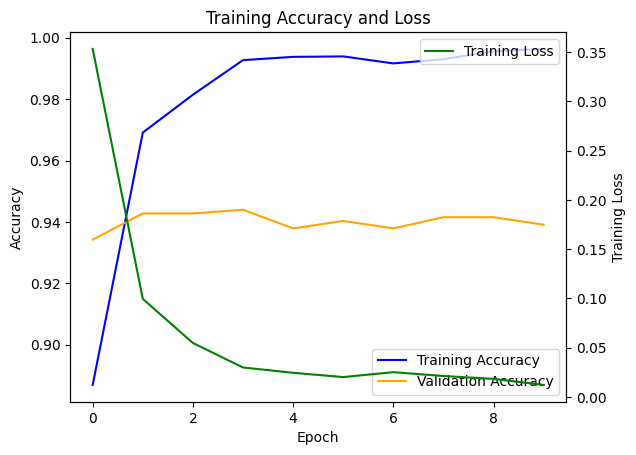

In [60]:
import matplotlib.pyplot as plt

# Crear figura y ejes
fig, ax1 = plt.subplots()

# Configurar ejes para la accuracy
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.plot(train_acc, label='Training Accuracy', color='blue')
ax1.plot(val_acc, label='Validation Accuracy', color='orange')
ax1.tick_params(axis='y')
ax1.legend(loc='lower right')

# Crear ejes secundario para el training loss
ax2 = ax1.twinx()
ax2.set_ylabel('Training Loss')
ax2.plot(train_loss, label='Training Loss', color='green')
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

# Título del gráfico
plt.title('Training Accuracy and Loss')
plt.savefig('fig/Data_aumentation_model_0306_efficientnetB0.png')  # Guardar el gráfico en la carpeta "fig"

# Mostrar el gráfico
plt.show()

# 1.1 Retrain model_0306_efficientnetB0

In [46]:
from tensorflow.keras.models import load_model
from datetime import datetime

def retrain_model(model_path, img_height, img_width, train_generator, validation_generator, epochs, save_path, save_name):
    start = datetime.now()

    # Cargar el modelo desde el archivo guardado
    model = load_model(model_path)

    # Compilar el modelo
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Entrenar el modelo
    history=model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

    # Guardar el modelo una vez finalizado el entrenamiento
    try:
        model.save(f"{save_path}/{save_name}.h5")
        print("Modelo guardado correctamente.")
    except:
        print("Error al guardar el modelo.")

    end = datetime.now()
    print(f"Tiempo de entrenamiento: {end-start}")
    
    return history


In [47]:
history=retrain_model("new2_model_0306_efficientnetB0.h5", 224, 224, train_generator, validation_generator, epochs=50, save_path=".", save_name="new2_model_0306_efficientnetB0_retrain")

Epoch 1/50
103/103 [==============================] - 350s 3s/step - loss: 0.0149 - accuracy: 0.9950 - val_loss: 0.2787 - val_accuracy: 0.9452
Epoch 2/50
103/103 [==============================] - 352s 3s/step - loss: 0.0154 - accuracy: 0.9950 - val_loss: 0.2674 - val_accuracy: 0.9525
Epoch 3/50
103/103 [==============================] - 360s 3s/step - loss: 0.0095 - accuracy: 0.9976 - val_loss: 0.2592 - val_accuracy: 0.9476
Epoch 4/50
103/103 [==============================] - 392s 4s/step - loss: 0.0076 - accuracy: 0.9980 - val_loss: 0.2879 - val_accuracy: 0.9488
Epoch 5/50
103/103 [==============================] - 373s 4s/step - loss: 0.0094 - accuracy: 0.9974 - val_loss: 0.3605 - val_accuracy: 0.9367
Epoch 6/50
103/103 [==============================] - 364s 4s/step - loss: 0.0110 - accuracy: 0.9965 - val_loss: 0.3089 - val_accuracy: 0.9440
Epoch 7/50
103/103 [==============================] - 351s 3s/step - loss: 0.0105 - accuracy: 0.9960 - val_loss: 0.3117 - val_accuracy: 0.9452

In [47]:
history=retrain_model("new2_model_0306_efficientnetB0.h5", 224, 224, train_generator, validation_generator, epochs=50, save_path=".", save_name="new2_model_0306_efficientnetB0_retrain")

Epoch 1/50
103/103 [==============================] - 350s 3s/step - loss: 0.0149 - accuracy: 0.9950 - val_loss: 0.2787 - val_accuracy: 0.9452
Epoch 2/50
103/103 [==============================] - 352s 3s/step - loss: 0.0154 - accuracy: 0.9950 - val_loss: 0.2674 - val_accuracy: 0.9525
Epoch 3/50
103/103 [==============================] - 360s 3s/step - loss: 0.0095 - accuracy: 0.9976 - val_loss: 0.2592 - val_accuracy: 0.9476
Epoch 4/50
103/103 [==============================] - 392s 4s/step - loss: 0.0076 - accuracy: 0.9980 - val_loss: 0.2879 - val_accuracy: 0.9488
Epoch 5/50
103/103 [==============================] - 373s 4s/step - loss: 0.0094 - accuracy: 0.9974 - val_loss: 0.3605 - val_accuracy: 0.9367
Epoch 6/50
103/103 [==============================] - 364s 4s/step - loss: 0.0110 - accuracy: 0.9965 - val_loss: 0.3089 - val_accuracy: 0.9440
Epoch 7/50
103/103 [==============================] - 351s 3s/step - loss: 0.0105 - accuracy: 0.9960 - val_loss: 0.3117 - val_accuracy: 0.9452

In [47]:
history=retrain_model("new2_model_0306_efficientnetB0.h5", 224, 224, train_generator, validation_generator, epochs=50, save_path=".", save_name="new2_model_0306_efficientnetB0_retrain")

Epoch 1/50
103/103 [==============================] - 350s 3s/step - loss: 0.0149 - accuracy: 0.9950 - val_loss: 0.2787 - val_accuracy: 0.9452
Epoch 2/50
103/103 [==============================] - 352s 3s/step - loss: 0.0154 - accuracy: 0.9950 - val_loss: 0.2674 - val_accuracy: 0.9525
Epoch 3/50
103/103 [==============================] - 360s 3s/step - loss: 0.0095 - accuracy: 0.9976 - val_loss: 0.2592 - val_accuracy: 0.9476
Epoch 4/50
103/103 [==============================] - 392s 4s/step - loss: 0.0076 - accuracy: 0.9980 - val_loss: 0.2879 - val_accuracy: 0.9488
Epoch 5/50
103/103 [==============================] - 373s 4s/step - loss: 0.0094 - accuracy: 0.9974 - val_loss: 0.3605 - val_accuracy: 0.9367
Epoch 6/50
103/103 [==============================] - 364s 4s/step - loss: 0.0110 - accuracy: 0.9965 - val_loss: 0.3089 - val_accuracy: 0.9440
Epoch 7/50
103/103 [==============================] - 351s 3s/step - loss: 0.0105 - accuracy: 0.9960 - val_loss: 0.3117 - val_accuracy: 0.9452

In [47]:
history=retrain_model("new2_model_0306_efficientnetB0.h5", 224, 224, train_generator, validation_generator, epochs=50, save_path=".", save_name="new2_model_0306_efficientnetB0_retrain")

Epoch 1/50
103/103 [==============================] - 350s 3s/step - loss: 0.0149 - accuracy: 0.9950 - val_loss: 0.2787 - val_accuracy: 0.9452
Epoch 2/50
103/103 [==============================] - 352s 3s/step - loss: 0.0154 - accuracy: 0.9950 - val_loss: 0.2674 - val_accuracy: 0.9525
Epoch 3/50
103/103 [==============================] - 360s 3s/step - loss: 0.0095 - accuracy: 0.9976 - val_loss: 0.2592 - val_accuracy: 0.9476
Epoch 4/50
103/103 [==============================] - 392s 4s/step - loss: 0.0076 - accuracy: 0.9980 - val_loss: 0.2879 - val_accuracy: 0.9488
Epoch 5/50
103/103 [==============================] - 373s 4s/step - loss: 0.0094 - accuracy: 0.9974 - val_loss: 0.3605 - val_accuracy: 0.9367
Epoch 6/50
103/103 [==============================] - 364s 4s/step - loss: 0.0110 - accuracy: 0.9965 - val_loss: 0.3089 - val_accuracy: 0.9440
Epoch 7/50
103/103 [==============================] - 351s 3s/step - loss: 0.0105 - accuracy: 0.9960 - val_loss: 0.3117 - val_accuracy: 0.9452

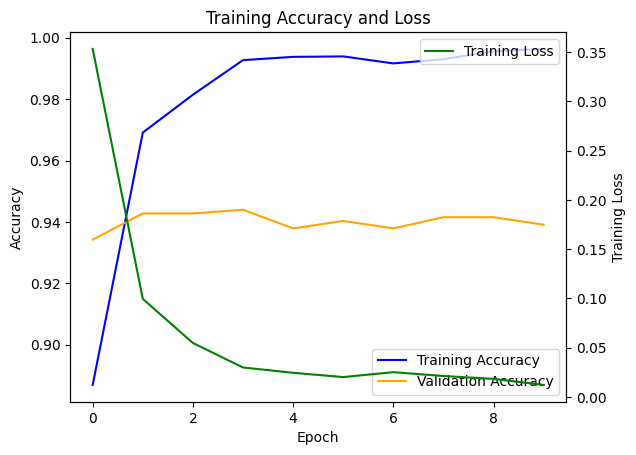

In [41]:
import matplotlib.pyplot as plt

# Crear figura y ejes
fig, ax1 = plt.subplots()

# Configurar ejes para la accuracy
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.plot(train_acc, label='Training Accuracy', color='blue')
ax1.plot(val_acc, label='Validation Accuracy', color='orange')
ax1.tick_params(axis='y')
ax1.legend(loc='lower right')

# Crear ejes secundario para el training loss
ax2 = ax1.twinx()
ax2.set_ylabel('Training Loss')
ax2.plot(train_loss, label='Training Loss', color='green')
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

# Título del gráfico
plt.title('Training Accuracy and Loss')
plt.savefig('fig/training_validation_loss1.png')  
# Mostrar el gráfico
plt.show()


In [ ]:
import h5py

def retrain_model(model_path, img_height, img_width, train_generator, validation_generator, epochs, save_path, save_name):
    start = datetime.now()

    # Cargar el modelo desde el archivo guardado
    model = load_model(model_path)

    # Compilar el modelo
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Entrenar el modelo
    history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

    # Guardar el modelo y el historial una vez finalizado el entrenamiento
    try:
        model.save(f"{save_path}/{save_name}.h5")
        with h5py.File(f"{save_path}/{save_name}.h5", 'a') as file:
            file.create_dataset('history', data=history.history)
        print("Modelo y historial guardados correctamente.")
    except:
        print("Error al guardar el modelo y el historial.")

    end = datetime.now()
    print(f"Tiempo de entrenamiento: {end - start}")

    return history

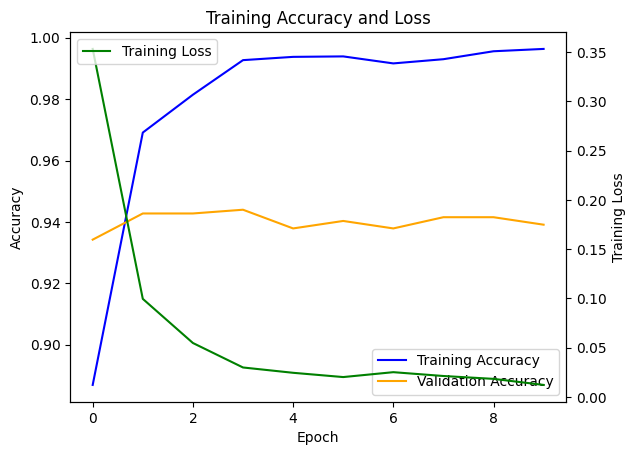

In [71]:
import matplotlib.pyplot as plt

# Crear figura y ejes
fig, ax1 = plt.subplots()

# Configurar ejes para la accuracy
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.plot(train_acc, label='Training Accuracy', color='blue')
ax1.plot(val_acc, label='Validation Accuracy', color='orange')
ax1.tick_params(axis='y')
ax1.legend(loc='lower right')

# Crear ejes secundario para el training loss (en la parte superior)
ax2 = ax1.twinx()
ax2.set_ylabel('Training Loss')
ax2.plot(train_loss, label='Training Loss', color='green')
ax2.tick_params(axis='y')
ax2.legend(loc='upper left')

# Título del gráfico
plt.title('Training Accuracy and Loss')

# Mostrar el gráfico
plt.show()


# 2. model_0306_efficientnetB0 V2 + FINE+TUNNING

In [48]:
from datetime import datetime
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#model_0306_efficientnetB0.v2

def create_model(path, name, img_height, img_width, train_generator, validation_generator, epochs, fine_tuning=False, data_augmentation=False):
    num_classes = 10

    start = datetime.now()

    # Crear el modelo base
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    # Definir el modelo final
    model = Model(inputs=base_model.input, outputs=predictions)

    # Congelar las capas del modelo base
    for layer in base_model.layers:
        layer.trainable = False

    # Compilar el modelo
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Entrenar el modelo
    if data_augmentation:
        # Aplicar data augmentation durante el entrenamiento
        train_datagen = ImageDataGenerator(
            rotation_range=10,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            vertical_flip=True
        )
        train_generator = train_datagen.flow_from_dataframe(
            dataframe=train_df,
            directory=data_directory,
            x_col='Image',
            y_col='Category',
            target_size=(img_height, img_width),
            class_mode='categorical',
            batch_size=32
        )

    if fine_tuning:
        # Descongelar las últimas capas del modelo base para el ajuste fino
        for layer in base_model.layers[-20:]:
            layer.trainable = True

    history=model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

    try:
        model.save(f"{path}/{name}.h5")
    except:
        print("Modelo no guardado")

    end = datetime.now()

    print(f"It took {end-start} time")


In [50]:
create_model(".", "model_0306_efficientnetB0v2.h5", 224, 224, train_generator, validation_generator, epochs=2)

Epoch 1/2
388/388 [==============================] - 577s 1s/step - loss: 0.2259 - accuracy: 0.9307 - val_loss: 0.1610 - val_accuracy: 0.9484
Epoch 2/2
388/388 [==============================] - 596s 2s/step - loss: 0.0716 - accuracy: 0.9766 - val_loss: 0.1711 - val_accuracy: 0.9562
It took 0:19:34.726723 time


# RESNET50

In [39]:
from datetime import datetime
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

def modelresnet(path, name, img_height, img_width, train_generator, validation_generator, epochs):
    num_classes = 10

    start = datetime.now()

    # Crear el modelo base
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    # Definir el modelo final
    model = Model(inputs=base_model.input, outputs=predictions)

    # Congelar las capas del modelo base
    for layer in base_model.layers:
        layer.trainable = False

    # Compilar el modelo
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Entrenar el modelo
    history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

    try:
        model.save(f"{path}/{name}.h5")
    except:
        print("Modelo no guardado")

    end = datetime.now()
    print(f"It took {end-start} time")

    return history


In [40]:
history=create_model(".", "resnet50.h5", 224, 224, train_generator, validation_generator, epochs=5)

94765736/94765736 [==============================] - 4s 0us/step
Epoch 1/5
388/388 [==============================] - 1650s 4s/step - loss: 0.3843 - accuracy: 0.8809 - val_loss: 0.2591 - val_accuracy: 0.9162
Epoch 2/5
388/388 [==============================] - 1622s 4s/step - loss: 0.1431 - accuracy: 0.9516 - val_loss: 0.2320 - val_accuracy: 0.9329
Epoch 3/5
388/388 [==============================] - 1463s 4s/step - loss: 0.0907 - accuracy: 0.9699 - val_loss: 0.2460 - val_accuracy: 0.9278
Epoch 4/5
388/388 [==============================] - 1204s 3s/step - loss: 0.0611 - accuracy: 0.9801 - val_loss: 0.2359 - val_accuracy: 0.9362
Epoch 5/5
388/388 [==============================] - 1206s 3s/step - loss: 0.0455 - accuracy: 0.9853 - val_loss: 0.2554 - val_accuracy: 0.9278
It took 1:59:15.239779 time


In [71]:
import h5py

def retrain_model(model_path, img_height, img_width, train_generator, validation_generator, epochs, save_path, save_name):
    start = datetime.now()

    # Cargar el modelo desde el archivo guardado
    model = load_model(model_path)

    # Compilar el modelo
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Entrenar el modelo
    history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

    # Guardar el modelo y el historial una vez finalizado el entrenamiento
    try:
        model.save(f"{save_path}/{save_name}.h5")
        with h5py.File(f"{save_path}/{save_name}.h5", 'a') as file:
            file.create_dataset('history', data=history.history)
        print("Modelo y historial guardados correctamente.")
    except:
        print("Error al guardar el modelo y el historial.")

    end = datetime.now()
    print(f"Tiempo de entrenamiento: {end - start}")

    return history

In [72]:
# Llamada a la función retrain_model
history = retrain_model("models/data_aumentation_model_0306_efficientnetB0.h5", img_height, img_width, train_generator, validation_generator, epochs=10, save_path="models", save_name="v3_aumentation_model_0306_efficientnetB0")

# Llamada a la función plot_metrics para visualizar los resultados
plot_metrics(history)


Epoch 1/10
103/103 [==============================] - 327s 3s/step - loss: 0.0217 - accuracy: 0.9933 - val_loss: 0.2576 - val_accuracy: 0.9379
Epoch 2/10
103/103 [==============================] - 346s 3s/step - loss: 0.0211 - accuracy: 0.9933 - val_loss: 0.2826 - val_accuracy: 0.9367
Epoch 3/10
103/103 [==============================] - 323s 3s/step - loss: 0.0235 - accuracy: 0.9921 - val_loss: 0.2423 - val_accuracy: 0.9476
Epoch 4/10
103/103 [==============================] - 347s 3s/step - loss: 0.0119 - accuracy: 0.9963 - val_loss: 0.2550 - val_accuracy: 0.9537
Epoch 5/10
103/103 [==============================] - 357s 3s/step - loss: 0.0080 - accuracy: 0.9980 - val_loss: 0.2630 - val_accuracy: 0.9452
Epoch 6/10
103/103 [==============================] - 357s 3s/step - loss: 0.0119 - accuracy: 0.9967 - val_loss: 0.3021 - val_accuracy: 0.9440
Epoch 7/10
103/103 [==============================] - 386s 4s/step - loss: 0.0121 - accuracy: 0.9976 - val_loss: 0.2843 - val_accuracy: 0.9464

NameError: name 'plt' is not defined

In [ ]:
data_aumentation_model_0306_efficientnetB0.h5

In [ ]:
import matplotlib.pyplot as plt

def plot_metrics(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    # Crear el gráfico de pérdida
    plt.figure(figsize=(10, 6))
    plt.plot(train_loss, label='Training Loss', linewidth=2)
    plt.plot(val_loss, label='Validation Loss', linewidth=2)
    plt.title('Loss', fontsize=16)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Crear el gráfico de precisión
    plt.figure(figsize=(10, 6))
    plt.plot(train_accuracy, label='Training Accuracy', linewidth=2)
    plt.plot(val_accuracy, label='Validation Accuracy', linewidth=2)
    plt.title('Accuracy', fontsize=16)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# PREDICTIONS

# 1. Prediction model_0306_efficientnetB0

Cardboard prediction

In [58]:
from tensorflow.keras.models import load_model

In [59]:
model = tf.keras.models.load_model('models/model_0306_efficientnetB0_retrain2.h5')

image_path = r"C:\Users\Leticia Martinez\Desktop\IRONHACK\Labs\Project_V\photo_test\cardboard1.jpg"

predicted_label, confidence, predictions = md.preprocess_and_predict1(image_path, model)

# Mostrar la clase predicha, la confianza y las predicciones
print('The waste image is:', predicted_label)
print('Confidence (%):', confidence)
print(predictions)

1/1 [==============================] - 1s 963ms/step
The waste image is: cardboard
Confidence (%): 86.64008975028992
[[1.6004200e-05 2.8754701e-10 5.3406854e-08 8.6640090e-01 1.7095229e-07
  2.4420669e-07 1.0486615e-05 4.7578728e-09 5.7507417e-04 1.5831505e-09
  1.1381507e-03 1.3185896e-01]]


In [60]:
model_path = 'models/model_0306_efficientnetB0_retrain2.h5'
evaluation_podel=md.evaluate_model(model_path, validation_generator)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 224, 224, 3)  0           ['normalization[0][0]']      

 block2a_project_conv (Conv2D)  (None, 56, 56, 24)   2304        ['block2a_se_excite[0][0]']      
                                                                                                  
 block2a_project_bn (BatchNorma  (None, 56, 56, 24)  96          ['block2a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2b_expand_conv (Conv2D)   (None, 56, 56, 144)  3456        ['block2a_project_bn[0][0]']     
                                                                                                  
 block2b_expand_bn (BatchNormal  (None, 56, 56, 144)  576        ['block2b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2b_e

 block3b_expand_bn (BatchNormal  (None, 28, 28, 240)  960        ['block3b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block3b_expand_activation (Act  (None, 28, 28, 240)  0          ['block3b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3b_dwconv (DepthwiseConv2  (None, 28, 28, 240)  6000       ['block3b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block3b_bn (BatchNormalization  (None, 28, 28, 240)  960        ['block3b_dwconv[0][0]']         
 )        

 D)                                                              ']                               
                                                                                                  
 block4b_bn (BatchNormalization  (None, 14, 14, 480)  1920       ['block4b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block4b_activation (Activation  (None, 14, 14, 480)  0          ['block4b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4b_se_squeeze (GlobalAver  (None, 480)         0           ['block4b_activation[0][0]']     
 agePooling2D)                                                                                    
          

 block5a_activation (Activation  (None, 14, 14, 480)  0          ['block5a_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5a_se_squeeze (GlobalAver  (None, 480)         0           ['block5a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5a_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block5a_se_squeeze[0][0]']     
                                                                                                  
 block5a_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block5a_se_reshape[0][0]']     
                                                                                                  
 block5a_s

 block5c_se_expand (Conv2D)     (None, 1, 1, 672)    19488       ['block5c_se_reduce[0][0]']      
                                                                                                  
 block5c_se_excite (Multiply)   (None, 14, 14, 672)  0           ['block5c_activation[0][0]',     
                                                                  'block5c_se_expand[0][0]']      
                                                                                                  
 block5c_project_conv (Conv2D)  (None, 14, 14, 112)  75264       ['block5c_se_excite[0][0]']      
                                                                                                  
 block5c_project_bn (BatchNorma  (None, 14, 14, 112)  448        ['block5c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5c_d

 block6b_project_bn (BatchNorma  (None, 7, 7, 192)   768         ['block6b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6b_drop (Dropout)         (None, 7, 7, 192)    0           ['block6b_project_bn[0][0]']     
                                                                                                  
 block6b_add (Add)              (None, 7, 7, 192)    0           ['block6b_drop[0][0]',           
                                                                  'block6a_project_bn[0][0]']     
                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6b_add[0][0]']            
                                                                                                  
 block6c_e

 block6d_add (Add)              (None, 7, 7, 192)    0           ['block6d_drop[0][0]',           
                                                                  'block6c_add[0][0]']            
                                                                                                  
 block7a_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6d_add[0][0]']            
                                                                                                  
 block7a_expand_bn (BatchNormal  (None, 7, 7, 1152)  4608        ['block7a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block7a_expand_activation (Act  (None, 7, 7, 1152)  0           ['block7a_expand_bn[0][0]']      
 ivation)                                                                                         
          

C:\Users\DataLeticia\miniconda3\envs\keras5\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DataLeticia\miniconda3\envs\keras5\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DataLeticia\miniconda3\envs\keras5\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Use

In [62]:
from tensorflow.keras.models import load_model
model = load_model("models/data_aumentation_model_0306_efficientnetB0.h5")

In [63]:
evaluation_data_aumentation=md.evaluate_model(model_path, validation_generator)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 224, 224, 3)  0           ['normalization[0][0]']      

 block2a_project_conv (Conv2D)  (None, 56, 56, 24)   2304        ['block2a_se_excite[0][0]']      
                                                                                                  
 block2a_project_bn (BatchNorma  (None, 56, 56, 24)  96          ['block2a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2b_expand_conv (Conv2D)   (None, 56, 56, 144)  3456        ['block2a_project_bn[0][0]']     
                                                                                                  
 block2b_expand_bn (BatchNormal  (None, 56, 56, 144)  576        ['block2b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2b_e

 block3b_expand_bn (BatchNormal  (None, 28, 28, 240)  960        ['block3b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block3b_expand_activation (Act  (None, 28, 28, 240)  0          ['block3b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3b_dwconv (DepthwiseConv2  (None, 28, 28, 240)  6000       ['block3b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block3b_bn (BatchNormalization  (None, 28, 28, 240)  960        ['block3b_dwconv[0][0]']         
 )        

 D)                                                              ']                               
                                                                                                  
 block4b_bn (BatchNormalization  (None, 14, 14, 480)  1920       ['block4b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block4b_activation (Activation  (None, 14, 14, 480)  0          ['block4b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4b_se_squeeze (GlobalAver  (None, 480)         0           ['block4b_activation[0][0]']     
 agePooling2D)                                                                                    
          

 block5a_activation (Activation  (None, 14, 14, 480)  0          ['block5a_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5a_se_squeeze (GlobalAver  (None, 480)         0           ['block5a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5a_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block5a_se_squeeze[0][0]']     
                                                                                                  
 block5a_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block5a_se_reshape[0][0]']     
                                                                                                  
 block5a_s

 block5c_se_expand (Conv2D)     (None, 1, 1, 672)    19488       ['block5c_se_reduce[0][0]']      
                                                                                                  
 block5c_se_excite (Multiply)   (None, 14, 14, 672)  0           ['block5c_activation[0][0]',     
                                                                  'block5c_se_expand[0][0]']      
                                                                                                  
 block5c_project_conv (Conv2D)  (None, 14, 14, 112)  75264       ['block5c_se_excite[0][0]']      
                                                                                                  
 block5c_project_bn (BatchNorma  (None, 14, 14, 112)  448        ['block5c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5c_d

 block6b_project_bn (BatchNorma  (None, 7, 7, 192)   768         ['block6b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6b_drop (Dropout)         (None, 7, 7, 192)    0           ['block6b_project_bn[0][0]']     
                                                                                                  
 block6b_add (Add)              (None, 7, 7, 192)    0           ['block6b_drop[0][0]',           
                                                                  'block6a_project_bn[0][0]']     
                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6b_add[0][0]']            
                                                                                                  
 block6c_e

 block6d_add (Add)              (None, 7, 7, 192)    0           ['block6d_drop[0][0]',           
                                                                  'block6c_add[0][0]']            
                                                                                                  
 block7a_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6d_add[0][0]']            
                                                                                                  
 block7a_expand_bn (BatchNormal  (None, 7, 7, 1152)  4608        ['block7a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block7a_expand_activation (Act  (None, 7, 7, 1152)  0           ['block7a_expand_bn[0][0]']      
 ivation)                                                                                         
          

C:\Users\DataLeticia\miniconda3\envs\keras5\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DataLeticia\miniconda3\envs\keras5\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DataLeticia\miniconda3\envs\keras5\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Use

In [64]:
from tensorflow.keras.models import load_model
model_re = load_model("models/model_0306_efficientnetB0_retrain1.h5")

In [54]:
from tensorflow.keras.models import load_model
model = load_model("model_0306_efficientnetB0v2.h5.h5")

In [54]:
from tensorflow.keras.models import load_model
model = load_model("model_0306_efficientnetB0v2.h5.h5")

In [66]:
from tensorflow.keras.models import load_model
model = load_model("models/data_aumentation_model_0306_efficientnetB0.h5")

In [67]:
evaluation_efficient_retrain3=md.evaluate_model(model_path, validation_generator)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 224, 224, 3)  0           ['normalization[0][0]']      

 block2a_project_conv (Conv2D)  (None, 56, 56, 24)   2304        ['block2a_se_excite[0][0]']      
                                                                                                  
 block2a_project_bn (BatchNorma  (None, 56, 56, 24)  96          ['block2a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2b_expand_conv (Conv2D)   (None, 56, 56, 144)  3456        ['block2a_project_bn[0][0]']     
                                                                                                  
 block2b_expand_bn (BatchNormal  (None, 56, 56, 144)  576        ['block2b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2b_e

 block3b_expand_bn (BatchNormal  (None, 28, 28, 240)  960        ['block3b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block3b_expand_activation (Act  (None, 28, 28, 240)  0          ['block3b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3b_dwconv (DepthwiseConv2  (None, 28, 28, 240)  6000       ['block3b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block3b_bn (BatchNormalization  (None, 28, 28, 240)  960        ['block3b_dwconv[0][0]']         
 )        

 D)                                                              ']                               
                                                                                                  
 block4b_bn (BatchNormalization  (None, 14, 14, 480)  1920       ['block4b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block4b_activation (Activation  (None, 14, 14, 480)  0          ['block4b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4b_se_squeeze (GlobalAver  (None, 480)         0           ['block4b_activation[0][0]']     
 agePooling2D)                                                                                    
          

 block5a_activation (Activation  (None, 14, 14, 480)  0          ['block5a_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5a_se_squeeze (GlobalAver  (None, 480)         0           ['block5a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5a_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block5a_se_squeeze[0][0]']     
                                                                                                  
 block5a_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block5a_se_reshape[0][0]']     
                                                                                                  
 block5a_s

 block5c_se_expand (Conv2D)     (None, 1, 1, 672)    19488       ['block5c_se_reduce[0][0]']      
                                                                                                  
 block5c_se_excite (Multiply)   (None, 14, 14, 672)  0           ['block5c_activation[0][0]',     
                                                                  'block5c_se_expand[0][0]']      
                                                                                                  
 block5c_project_conv (Conv2D)  (None, 14, 14, 112)  75264       ['block5c_se_excite[0][0]']      
                                                                                                  
 block5c_project_bn (BatchNorma  (None, 14, 14, 112)  448        ['block5c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5c_d

 block6b_project_bn (BatchNorma  (None, 7, 7, 192)   768         ['block6b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6b_drop (Dropout)         (None, 7, 7, 192)    0           ['block6b_project_bn[0][0]']     
                                                                                                  
 block6b_add (Add)              (None, 7, 7, 192)    0           ['block6b_drop[0][0]',           
                                                                  'block6a_project_bn[0][0]']     
                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6b_add[0][0]']            
                                                                                                  
 block6c_e

 block6d_add (Add)              (None, 7, 7, 192)    0           ['block6d_drop[0][0]',           
                                                                  'block6c_add[0][0]']            
                                                                                                  
 block7a_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6d_add[0][0]']            
                                                                                                  
 block7a_expand_bn (BatchNormal  (None, 7, 7, 1152)  4608        ['block7a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block7a_expand_activation (Act  (None, 7, 7, 1152)  0           ['block7a_expand_bn[0][0]']      
 ivation)                                                                                         
          

C:\Users\DataLeticia\miniconda3\envs\keras5\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DataLeticia\miniconda3\envs\keras5\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DataLeticia\miniconda3\envs\keras5\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Use